<a href="https://colab.research.google.com/github/Jbarrera2000/Long_Term_Stock_Forecasting_Investops/blob/main/Long_term_stock_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clone the repo from GitHub to Google Colab's temporary drive

In [ ]:
if "google_colab" in str(get_ipython()):

  import os
  work_dir="/content/Invest0ps-Tutorials/"
  if not os.path.exists(work_dir):
    !git clone https://github.com/Hvass-Labs/InvestOps-Tutorials.git

  os.chdir(work_dir)

  !pip install -r requirements.txt 

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
!pip install investops
from investops.stock_forecast import StockForecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 323 kB/s 


In [ ]:
import investops as iv

In [ ]:
iv.__version__

'0.4.0'

In [ ]:
# Random Number generator
rng = np.random.default_rng(seed=80085)

## Helper Functions

In [ ]:
def print_forecast(model, cur_val_ratio):
  """
  Use the given model to forecast the future stock-returns and print the mean and standard deviation
  for the return distribution

  :param model: StockForecast object.
  :param cur_val_ratio: Float with current valuation ratio
  """
  # Use the forecasting model to predict the future annualized return.
  # This gives a mean and std.dev. for the return distribution.
  forecast_mean, forecast_std=\
    model.forecast(cur_val_ratio=cur_val_ratio)

  print(f"Forecast Mean: {forecast_mean:.1%}")
  print(f"Forecast Std: {forecast_std:.1%}")




 Simple Example

In [ ]:
# Current valuation ratio for today
# This could be today's P/Sales or P/E ratio
cur_val_ratio= 1.1

#Possible future valuation ratios
# These could be e.g. P/Sales or P/E ratios
val_ratio=[0.8, 1.0, 1.2]

# Possible future Growth rates
# example, a value of -0.053 means a Growth Rate of -5.3%
# Note: This must be consistent with the valuation ratio, so if your are using the P/Sales ratios then 
# you must use the growth-rate for the Sales per Share
growth=[-0.1, 0.0, 0.2]

# Posible future Dividends Yields
# For example, a value of 0.025 means a dividend yield of 2.5%
div_yield = [0.04, 0.02, 0.01]

# Probabilities for the different future outcomes
# These should be between 0 and 1 and must sum to 1
# In this example the probabilities are heavily skewed so the first case occurs with a very high 
# probability of 0.7 or 70%
prob = [0.7, 0.2, 0.1]

In [ ]:
# Create a forecasting model and fit it with the data above for the possible future values
# which are set to be DEPENDENT here, so the three arrays with possible future outcomes will be sampled 
# in the same order. We are interested in 3-year annualized returns.
model_dep= StockForecast(div_yield=div_yield, val_ratio=val_ratio,
                         growth=growth, dependent=True, years=3,
                         rng=rng, prob=prob)

In [ ]:
# Create a forecasting model using the same data as above but now the possible ffuture values are set 
# INDEPENDENT so the three arrays with possible future outcomes will be sampled independently of each
# other. We are still interested in 3-year annualized returns
model_ind = StockForecast(div_yield=div_yield, val_ratio=val_ratio,
                          growth=growth, dependent=True, years=3,
                          rng=rng, prob_div_yield=prob,
                          prob_growth=prob, prob_val_ratio=prob)

In [ ]:
 # Use forecasting model with DEPENDENT sampling of future values.
 # show the forecastedd mean and std.dev. for the future return
 print_forecast(model=model_dep, cur_val_ratio=cur_val_ratio)

Forecast Mean: -8.8%
Forecast Std: 12.6%


In [ ]:
# Use forecasting model with INDEOENDDET sampling of future values
# show the forecasted mean adn std.dev for the future return
print_forecast(model=model_ind, cur_val_ratio=cur_val_ratio)

Forecast Mean: 2.6%
Forecast Std: 16.8%


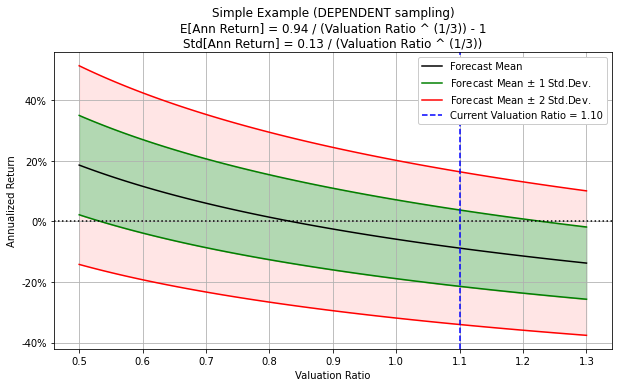

In [ ]:
#Plot forecasting model with DEPENDENT sampling of future values
tittle_dep = "Simple Example (DEPENDENT sampling)"
model_dep.plot(title=tittle_dep, cur_val_ratio=cur_val_ratio,
               min_val_ratio=0.5, max_val_ratio=1.3);

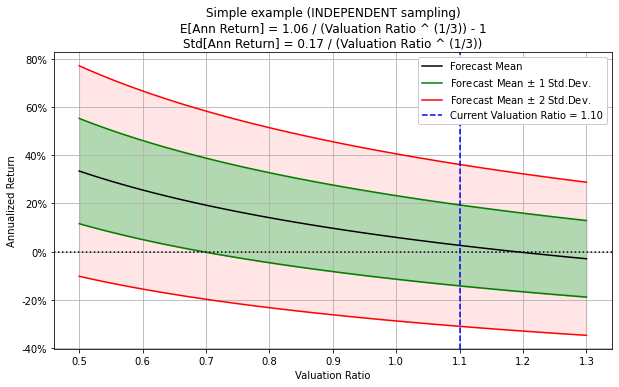

In [ ]:
# Plot forecating model with INDEPENDENT sampling of future values
title_ind= "Simple example (INDEPENDENT sampling)"
model_ind.plot(title=title_ind, cur_val_ratio=cur_val_ratio,
               min_val_ratio=0.5, max_val_ratio=1.3);

In [ ]:
# Generate random historical valuation ratios and ann. returns
hist_val_ratios, hist_ann_rets=\
  model_ind.random(min_val_ratio=0.5, max_val_ratio=1.5, num_samples=500)

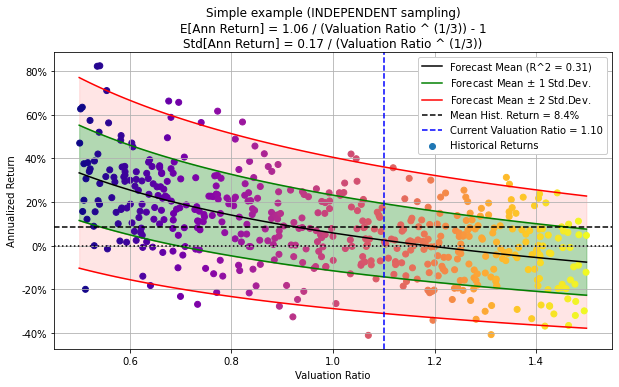

In [ ]:
# Plot forecating model with INDEPENDENT sampling of future values,
# and overlay the "synthetic" historical stock-returns
model_ind.plot(title=title_ind, cur_val_ratio=cur_val_ratio,
               hist_val_ratios=hist_val_ratios,
               hist_ann_rets=hist_ann_rets,
               min_val_ratio=0.5, max_val_ratio=1.3);

## Case Study: Procter & Gamble (PG)

In [ ]:
from data import StockData

In [ ]:
# Object for loading and preprocessing the stock-data
# This automatically loads CSV data-files from disk
stock_PG = StockData(ticker='PG')

# Currently P/Sales ratio for the PG stock in March 2022
cur_val_ratio_PG= 4.4

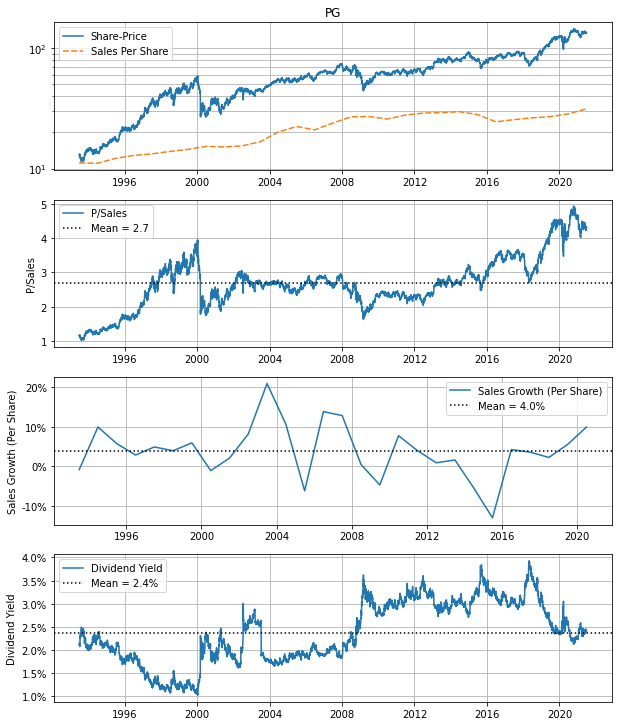

In [ ]:
stock_PG.plot_basic_data(log_shareprice=True);

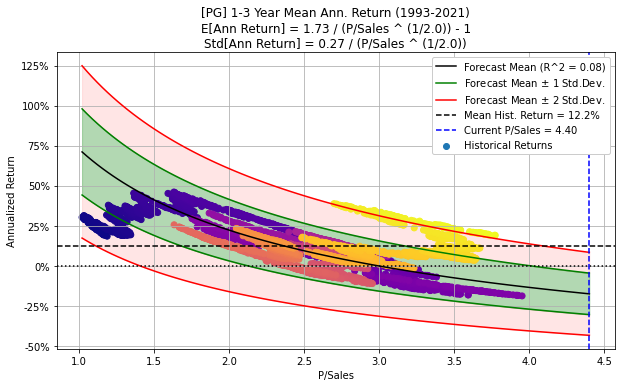

In [ ]:
# Plot forecaasting model for 1-3 year investment periods
stock_PG.plot_forecast(min_years=1, max_years=3,
                       cur_val_ratio=cur_val_ratio_PG, rng=rng);

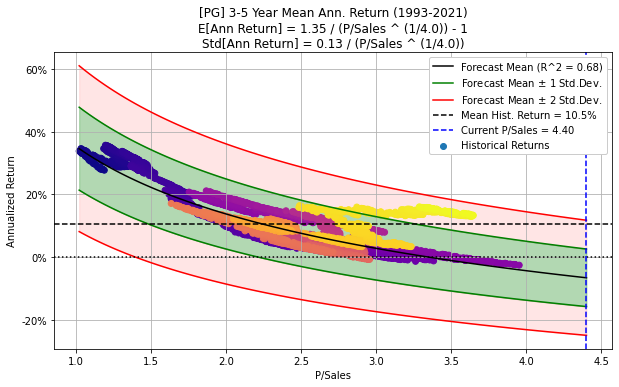

In [ ]:
# Plot forecaasting model for 3-5 year investment periods
stock_PG.plot_forecast(min_years=3, max_years=5,
                       cur_val_ratio=cur_val_ratio_PG, rng=rng);

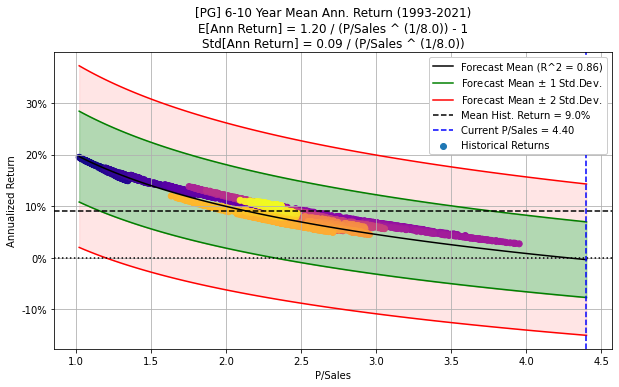

In [ ]:
# Plot forecasting model for 6-10 year investment periods.
fig, model_PG=\
  stock_PG.plot_forecast(min_years=6, max_years=10,
                        cur_val_ratio=cur_val_ratio_PG, rng=rng);

considering 6-10 year investment periods instead. This gives an exceptionally good fit between the forecasted mean and the historical stock-returns as measured by the R value (R^2=0.86).

In [ ]:
# Use forecasting model from today and going 6-10 years into the future with the current valuation ratio.
print_forecast(model=model_PG, cur_val_ratio=cur_val_ratio_PG)

Forecast Mean: -0.4%
Forecast Std: 7.3%


## Case study: Wal-Mart(WMT)

In [ ]:
stock_WMT = StockData(ticker='WMT')

cur_val_ratio_WMT = 0.69

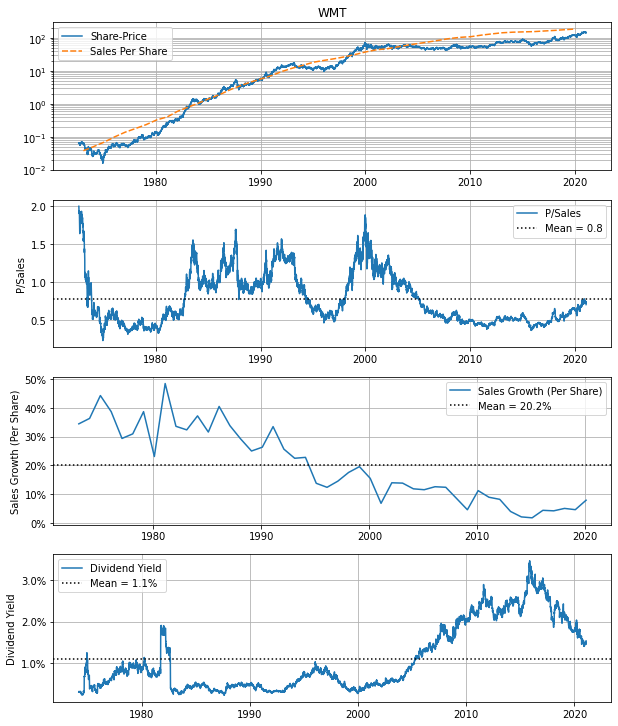

In [ ]:
stock_WMT.plot_basic_data(log_shareprice=True);

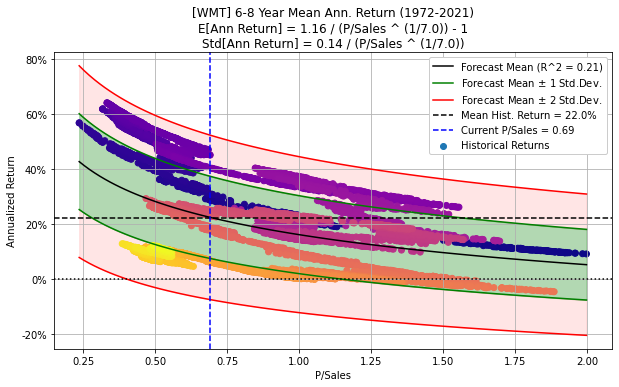

In [ ]:
stock_WMT.plot_forecast(min_years=6, max_years=8,
                        cur_val_ratio=cur_val_ratio_WMT, rng=rng);
                        

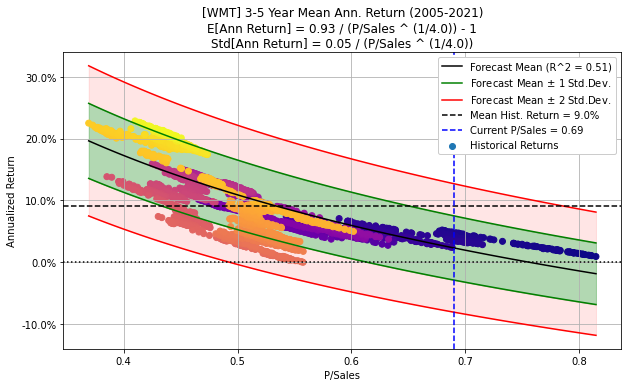

In [ ]:
fig, model_WMT=\
stock_WMT.plot_forecast(min_years=3, max_years=5,
                        cur_val_ratio=cur_val_ratio_WMT, rng=rng,
                        start_date='2005');

In [ ]:
print_forecast(model=model_WMT, cur_val_ratio=cur_val_ratio_WMT)

Forecast Mean: 2.3%
Forecast Std: 5.2%
